# Famous and commonly used programming languages and salary of programmers  in Bangladesh

A data analysis based approach using Stackoverflow’s 2017,2018 and 2019 Annual Developer Survey data.

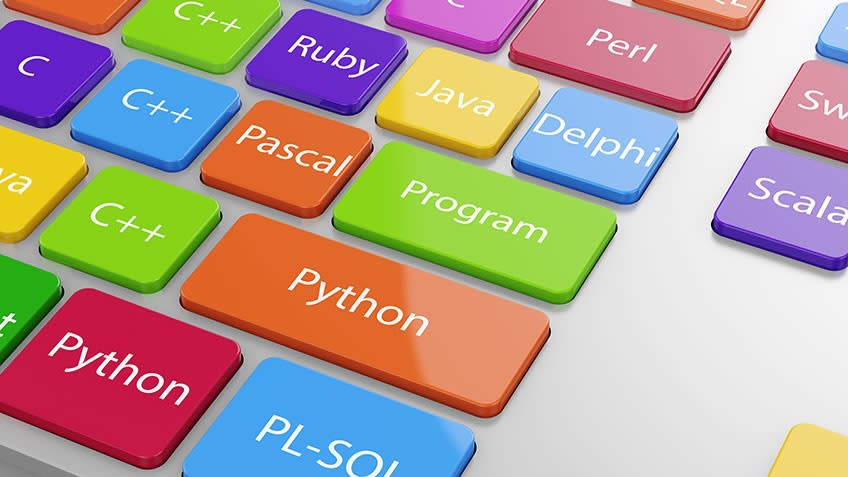

## Introduction

In this era where fields like Machine Learning, Data Science and Artificial intelligence are taking a rise, it is most likely that programming languages related to these fields will be in heavy use in a certain country. Being from Bangladesh, I am just curious if it is true or not. is Python or R the most used and popular language in my country ? Are these languages booming enough the way it is doing in other countries? My whole data analysis approach in these notebook will be to find the answer of these above questions and few other relevant questions.


In the following parts of this article, we will trying to find the answer of our questions by analyze real data to verify if our assumptions are right or it is just a hoax. We will be using data from annual survey of StackOverflow, a famous website to programmers from all over the world. The survey from 2017,2018 and 2019 in taking into account for the purpose of our analysis.

Before jumping into the analysis it is necessary to give a brief introduction about the data. Every year, Stack Overflow conducts a massive survey on the programmers on the site, covering all sorts of information starting from education to used programming languages, jobs, code style the follow and so on. We will picking few columns from the data to answer our questions. There were 150 questions on that survey and few sample of those questions are given below :

- What frameworks do you work with?
- What is your undergrad institution?
- Which programming language you are using this year?
- Which language are you planning to use next year ?

In [1]:
#Will be used for the exploration of data
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
#pd.pandas.set_option('display.max_columns', None)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="dark")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading and saving Survey data in indivudual data frames
df_2017 = pd.read_csv('2017/survey_results_public.csv')
df_2018 = pd.read_csv('2018/survey_results_public.csv')
df_2019 = pd.read_csv('2019/survey_results_public.csv')

In [3]:
# Sample of data from each year
print(df_2017.head())



   Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Emp

In [4]:
print(df_2018.head())


   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology,

In [5]:
# Sample 2019 Data
print(df_2019.head())

   Respondent                                         MainBranch Hobbyist  \
0           1             I am a student who is learning to code      Yes   
1           2             I am a student who is learning to code       No   
2           3  I am not primarily a developer, but I write co...      Yes   
3           4                     I am a developer by profession       No   
4           5                     I am a developer by profession      Yes   

                  OpenSourcer  \
0                       Never   
1     Less than once per year   
2                       Never   
3                       Never   
4  Once a month or more often   

                                          OpenSource  \
0  The quality of OSS and closed source software ...   
1  The quality of OSS and closed source software ...   
2  The quality of OSS and closed source software ...   
3  The quality of OSS and closed source software ...   
4  OSS is, on average, of HIGHER quality than pro...   

 

In [6]:
#Description of every dataframe 

print(df_2017.describe())
print('-------------------------------------------------------')
print(df_2018.describe())
print('-------------------------------------------------------')
print(df_2019.describe())

         Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
count  51392.000000        42695.000000     40376.000000  20600.000000   
mean   25696.500000            7.300574         6.957078      3.952282   
std    14835.736854            1.955444         2.167652      7.564722   
min        1.000000            0.000000         0.000000      0.000000   
25%    12848.750000            6.000000         6.000000      1.000000   
50%    25696.500000            8.000000         7.000000      1.000000   
75%    38544.250000            9.000000         8.000000      4.000000   
max    51392.000000           10.000000        10.000000     40.000000   

       StackOverflowSatisfaction         Salary  ExpectedSalary  
count               36592.000000   12891.000000     2566.000000  
mean                    8.429875   56298.480641    33142.220468  
std                     1.390635   39880.905277    30162.988829  
min                     0.000000       0.000000        0.000000  
25%

## 1. What are the most popular programming languages in Bangladesh?

To answer this particular question, at first I tried to extract the language someone already worked with and language they want to work in future. Later, I seperated this 2 columns into two different dataframe.

In [7]:
def filter_by_country(df, column_name, ColumnValue, columns):
    ''' Func: Filter a dataframe by country
        df: Dataframe containing the data
        column_name: The column you want the filter to based on
        ColumnValue:The value of that particular column
        Columns: Columns that will be used for filteration.
        
        Return: 
        dfFinal:a filtered dataframe 
    '''
    
    df_final = df
    
    for column in columns: 
        df_final = df_final[df_final[column_name] == ColumnValue].dropna(subset=[column])
        
    return df_final

# Filter the dataframe based on Bangladesh and selecting necessary columns to answer our question.
bd_17 = filter_by_country(df_2017, 'Country', 'Bangladesh', ['HaveWorkedLanguage', 'Salary'])
bd_18 = filter_by_country(df_2018, 'Country', 'Bangladesh', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
bd_19 = filter_by_country(df_2019, 'Country', 'Bangladesh', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
#Printing out the column to see out
print(bd_19.head())

     Respondent                                         MainBranch Hobbyist  \
41           42                     I am a developer by profession      Yes   
169         171             I am a student who is learning to code      Yes   
298         300             I am a student who is learning to code       No   
322         324                     I am a developer by profession      Yes   
687         690  I used to be a developer by profession, but no...       No   

                                           OpenSourcer  \
41   Less than once a month but more than once per ...   
169                            Less than once per year   
298                         Once a month or more often   
322                                              Never   
687                         Once a month or more often   

                                            OpenSource  \
41   OSS is, on average, of HIGHER quality than pro...   
169  OSS is, on average, of HIGHER quality than pro...   
29

In the following portion, the 2 columns with divided into 2 different dataframe for visualization purpose. So we will have 6 dataframes

In [8]:
def split_df(df, column):
    
    
    ''' Func: getting 2 dataframe of 2 columns 
        df: Dataframe containing the2 columns
        column: The column we want 
        
        
        Return: 
        dfFinal:a  series for that particular column 
    '''
    
    df_col = df
    col_final = df_col[column].apply(lambda x: x.split(';'))
    
    return col_final

# Splitting the Data Frame by column into a Series. 
#current_lang_17 = split_df(bd_17, 'HaveWorkedLanguage')
#future_lang_17 = split_df(bd_17, 'WantWorkLanguage')

current_lang_18 = split_df(bd_18, 'LanguageWorkedWith')
future_lang_18 = split_df(bd_18, 'LanguageDesireNextYear')



current_lang_19 = split_df(bd_19, 'LanguageWorkedWith')
future_lang_19 = split_df(bd_19, 'LanguageDesireNextYear')

#printing to see out

print(current_lang_19)

41                 [HTML/CSS, JavaScript, PHP, TypeScript]
169      [Assembly, C, C++, C#, HTML/CSS, Java, Objecti...
298                      [HTML/CSS, Java, JavaScript, SQL]
322            [C#, HTML/CSS, JavaScript, SQL, TypeScript]
687                                             [Assembly]
                               ...                        
88081                      [C#, HTML/CSS, JavaScript, SQL]
88130                                [Assembly, Other(s):]
88268                     [HTML/CSS, JavaScript, PHP, SQL]
88390                                           [Assembly]
88576                                              [Scala]
Name: LanguageWorkedWith, Length: 568, dtype: object


In [9]:
def count_per_lang(lang_list, year):
    
    
    ''' Func: doing the counting for per language 
        lang_list: list for the count
        year: The year  
        
        
        Return: 
        lang_count:the counted number 
    '''
    #print(list(data_list))
    group = dict(Counter(lang_list))
    lang_count = [{'Prog Lang':key, 'Count': value, 'Year': year} for key, value in group.items()]
    
    return lang_count

# Groping a list and creating a dict.
#current_lang_17 = count_per_lang(sum(current_lang_17,[]), '2017')
#future_lang_17 = count_per_lang(sum(future_lang_17,[]), '2017')


current_lang_18 = count_per_lang(sum(current_lang_18,[]), '2018')
future_lang_18 = count_per_lang(sum(future_lang_18,[]), '2018')

current_lang_19 = count_per_lang(sum(current_lang_19,[]), '2019')
future_lang_19 = count_per_lang(sum(future_lang_19,[]), '2019')


In [10]:
print(future_lang_19)

[{'Prog Lang': 'JavaScript', 'Count': 376, 'Year': '2019'}, {'Prog Lang': 'PHP', 'Count': 204, 'Year': '2019'}, {'Prog Lang': 'TypeScript', 'Count': 144, 'Year': '2019'}, {'Prog Lang': 'Bash/Shell/PowerShell', 'Count': 102, 'Year': '2019'}, {'Prog Lang': 'Clojure', 'Count': 17, 'Year': '2019'}, {'Prog Lang': 'Dart', 'Count': 48, 'Year': '2019'}, {'Prog Lang': 'HTML/CSS', 'Count': 284, 'Year': '2019'}, {'Prog Lang': 'Java', 'Count': 200, 'Year': '2019'}, {'Prog Lang': 'Kotlin', 'Count': 95, 'Year': '2019'}, {'Prog Lang': 'Python', 'Count': 339, 'Year': '2019'}, {'Prog Lang': 'SQL', 'Count': 269, 'Year': '2019'}, {'Prog Lang': 'C#', 'Count': 129, 'Year': '2019'}, {'Prog Lang': 'Assembly', 'Count': 32, 'Year': '2019'}, {'Prog Lang': 'Swift', 'Count': 83, 'Year': '2019'}, {'Prog Lang': 'WebAssembly', 'Count': 45, 'Year': '2019'}, {'Prog Lang': 'Other(s):', 'Count': 34, 'Year': '2019'}, {'Prog Lang': 'F#', 'Count': 19, 'Year': '2019'}, {'Prog Lang': 'C++', 'Count': 120, 'Year': '2019'}, {'P

In [11]:
def create_dataframe(data_dicts):
    

    ''' Func: Create two dataframes and append theme 
        data_dicts: two dataframe  
        
        
        Return: 
        df:an appended dataframe 
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    #df3 = pd.DataFrame(data_dicts[2])

    df = df1.append(df2)
    #df = df.append(df3)
    
    
    return df

# Creating a Data Frame appending the data.
current_lang = create_dataframe([current_lang_18,current_lang_19])
future_lang = create_dataframe([ future_lang_18,future_lang_19])

In [12]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    
    ''' Func: Scaling the data
        df: df to scale
        Column: specific column
        
        
        Return: 
        joined_series:scaled data 
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
current_lang['Percentage'] = percentage(current_lang, 'Year')
future_lang['Percentage'] = percentage(future_lang, 'Year')

In [13]:
# Get the top 10 languages
top_10_worked_lang = current_lang.sort_values(by=['Percentage'], ascending=False).head(10)['Prog Lang'].unique()
top_10_wanted_lang = future_lang.sort_values(by=['Percentage'], ascending=False).head(10)['Prog Lang'].unique()

current_lang_chart = current_lang[current_lang['Prog Lang'].isin(top_10_worked_lang)]
future_lang_chart = future_lang[future_lang['Prog Lang'].isin(top_10_worked_lang)]

We can see that classic languages like: **Java Script**, **SQL**, **Java** are still in the top positions. Stack Overflow 2017 survey data and Stack Overflow 2018 survey data

We can see that in 2018 two programming languages have risen such as **HTML** and **CSS**, but these programming languages are old and commonly used, this probably happened because in the StackOverflow Survey of 2017 it was probably not possible to select these two languages as option.

In [14]:

current_lang_chart=current_lang_chart.append({'Prog Lang' : 'HTML/CSS' , 'Count' : 754 , 'Year' : '2018' , 'Percentage' : 0.237771} , ignore_index=True)
print("print ",current_lang_chart)
current_lang_chart.sort_values(by='Percentage', ascending=False)
current_lang_chart.drop([3,4],axis=0,inplace=True)

print       Prog Lang  Count  Year  Percentage
0         Java    250  2018    0.080985
1          SQL    297  2018    0.096210
2   JavaScript    351  2018    0.113703
3         HTML    375  2018    0.121477
4          CSS    359  2018    0.116294
5          PHP    286  2018    0.092647
6     HTML/CSS    409  2019    0.140695
7   JavaScript    391  2019    0.134503
8          PHP    288  2019    0.099071
9         Java    255  2019    0.087719
10         SQL    318  2019    0.109391
11    HTML/CSS    754  2018    0.237771


In [15]:

future_lang_chart=future_lang_chart.append({'Prog Lang' : 'HTML/CSS' , 'Count' : 447 , 'Year' : '2018' , 'Percentage' : 0.151034} , ignore_index=True)
print("print ",future_lang_chart)
future_lang_chart.sort_values(by='Percentage', ascending=False)
future_lang_chart.drop([3,4],axis=0,inplace=True)

print       Prog Lang  Count  Year  Percentage
0         Java    226  2018    0.075813
1          SQL    226  2018    0.075813
2   JavaScript    304  2018    0.101979
3         HTML    225  2018    0.075478
4          CSS    222  2018    0.074472
5          PHP    178  2018    0.059712
6   JavaScript    376  2019    0.123929
7          PHP    204  2019    0.067238
8     HTML/CSS    284  2019    0.093606
9         Java    200  2019    0.065920
10         SQL    269  2019    0.088662
11    HTML/CSS    447  2018    0.151034


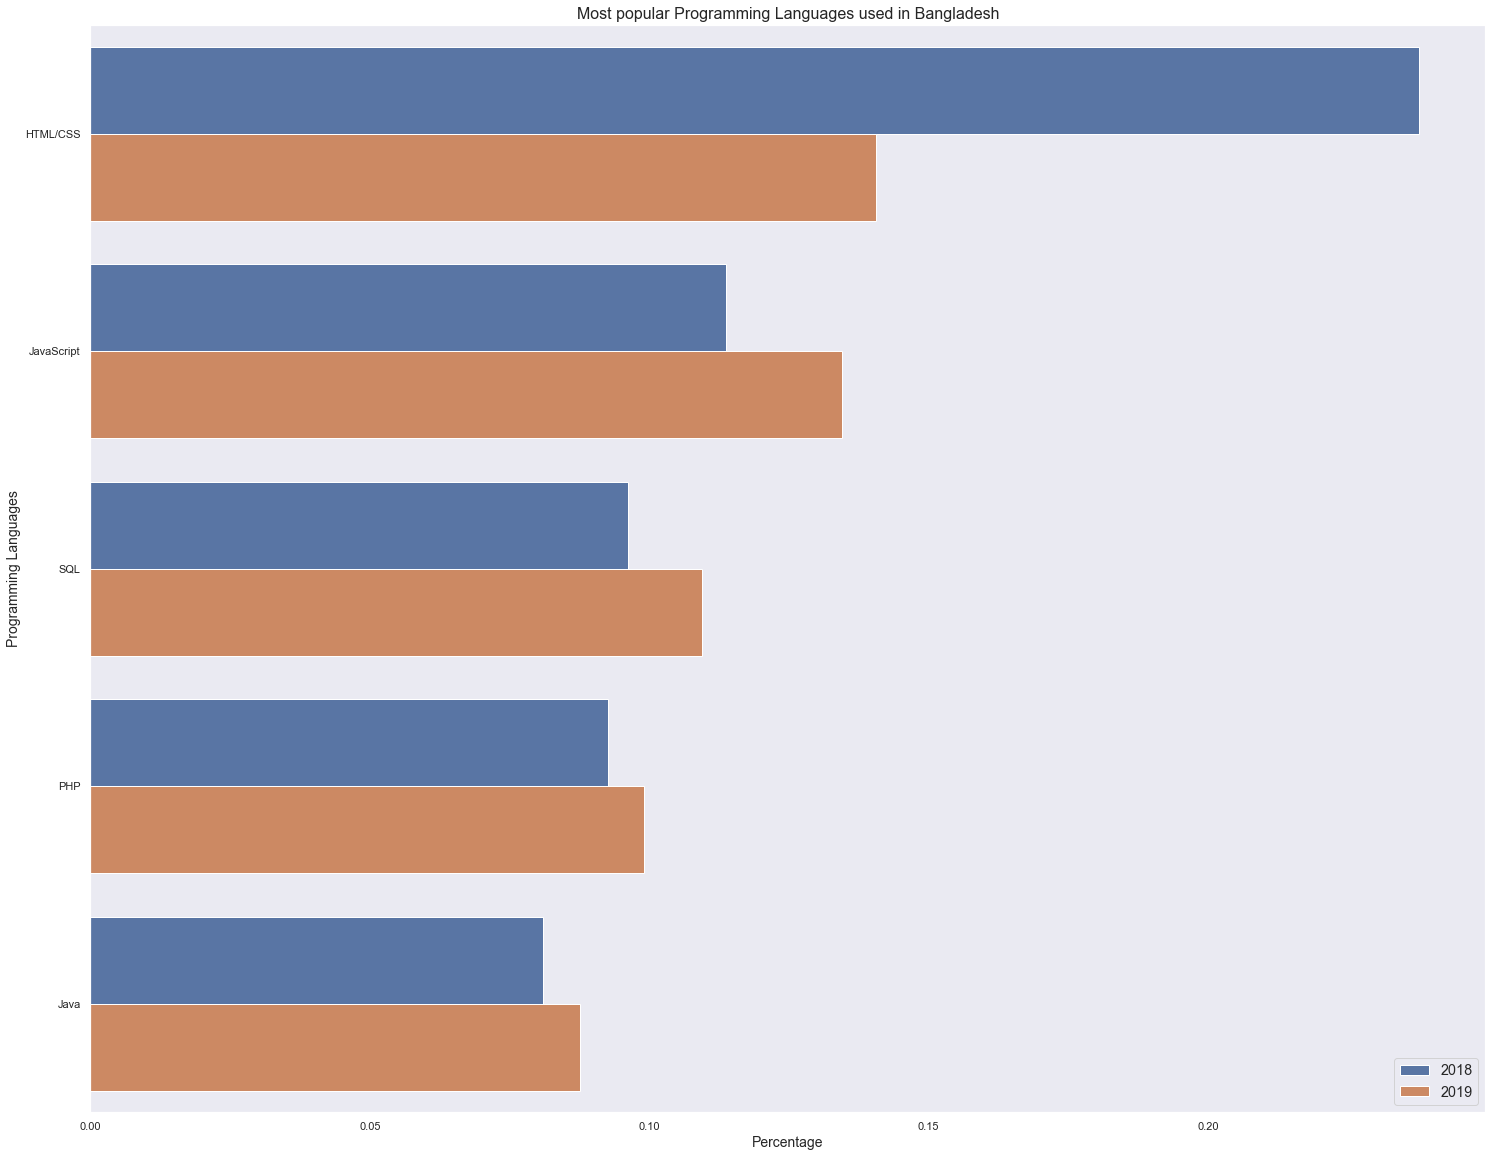

"\n\nobjects = current_lang_chart['Prog Lang']\ny_pos = current_lang_chart['Percentage']\nperformance = [10,8,6,4,2,1]\n\nplt.bar(objects, y_pos)\n\nplt.show()\n"

In [16]:
# Figure 1 — Percentage of use of programming
plt.figure(figsize=(25,20))
sns.barplot(x = 'Percentage', 
            y = 'Prog Lang',
            hue = 'Year',
            data = current_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most popular Programming Languages used in Bangladesh', size = 16)
plt.show()

'''

objects = current_lang_chart['Prog Lang']
y_pos = current_lang_chart['Percentage']
performance = [10,8,6,4,2,1]

plt.bar(objects, y_pos)

plt.show()
'''

## Part 2 — What are the most desired programming languages in Bangladesh?

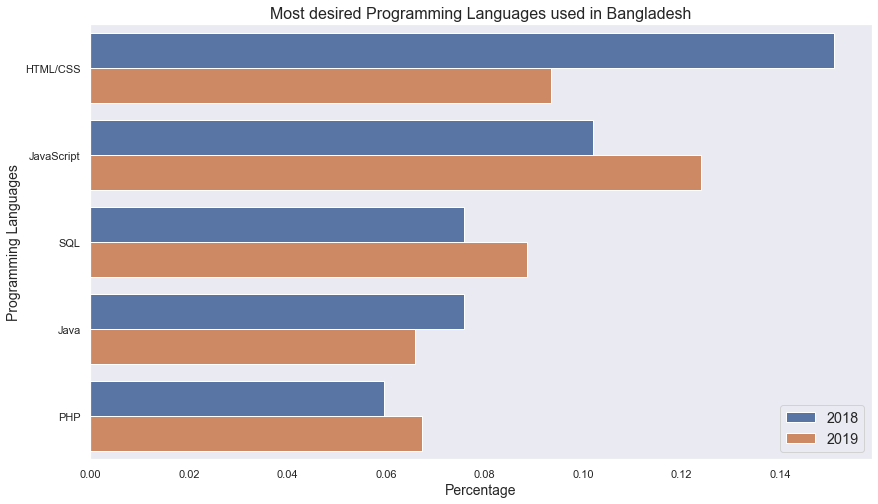

In [17]:
# Figure 2 — Percentage of desire of programming languages

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Prog Lang',
            hue = 'Year',
            data = future_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most desired Programming Languages used in Bangladesh', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

We can see that **HTML/CSS** have grown tremendously . This is probably happening because web development is very popular in Bangladesh this languages have been used extensively in web dev areas.

Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.

## Part 3 —What is the average salary for each programming language in 2017 in Bangladesh ?

For answering this question,  the desired columns will be selected.HaveWorkedLanguage', 'Salary' are the 2 columns will be looked in to answer the question.
If the row had Salary or HaveWorkedLanguage as Nan then the row would be dropped for the simplicity purpose. Any kind of imputation wont make any sense here and hence choosing to drop that. 

In [18]:
data = bd_17.copy()

data = data.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
data.head()


split_col = pd.DataFrame(columns = ['HaveWorkedLanguage', 'Salary'])
for index, row in data.iterrows():
        columns = row['HaveWorkedLanguage'].split(';')
        for c in columns:
            split_col.loc[len(split_col)] = [c, row['Salary']]

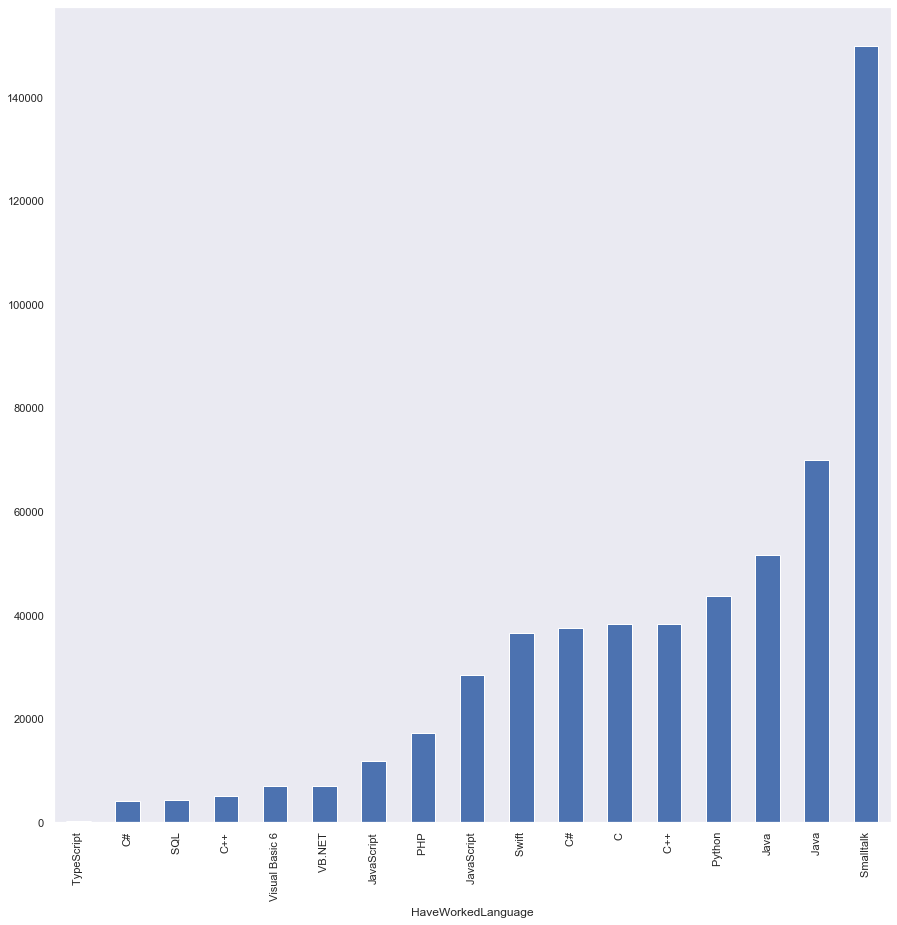

In [19]:
#bar plot of salary 
data = split_col.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
plt.figure(figsize=(15,15))
data.plot(kind = 'bar')
plt.savefig('salary')

## Conclusion

In this notebook,  what were the most popular and most wanted programming languages have been found out using Stackoverflow’s 2018 and 2019 Annual Developer Survey report.

1. We have seen that some older programming languages such as **JavaScript**, **SQL**, and **Java** still seems to be popular.
2. Programming languages like **HTML/CSS** have been in top demand  to be learned because of peoples interest in web development though the oldest ones still are in high demand.
3. It is visible from the bar chart that the average salaries for each language range from pretty low(around 1k) to over 100K. What’s interesting is that the most popular languages that we found in the last section are of a lower salary expectation. This makes sense as if more people know how to use a language, that skill will result in a low salary.

To see more about this analysis, see the link to my medium post available [here](https://medium.com/@ibnfarabishihab3/famous-and-commonly-used-programming-languages-and-salary-of-programmers-in-bangladesh-631e262a7d0?source=friends_link&sk=17db7161e54f5432aaf0b321bda4d7cc).

## References

Stackoverflow Developer Survey Data: [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey) <br>
